In [135]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as p
import scipy

%matplotlib inline


In [180]:
matrix = p.read_csv('../data/2027-02-27_spatialbarcode_SG_expression/roi_2/matrix_decode_1_segmentation_1_nuclei.csv',index_col=0)


In [181]:
matrix['cell_id'] = matrix.index


In [182]:
matrix['bc_006']

1        0
2        0
3        0
4        0
5        0
        ..
16372    0
16373    0
16374    0
16375    0
16376    0
Name: bc_006, Length: 16376, dtype: int64

In [183]:
barcode_cols = ['bc_{:03d}'.format(i) for i in range(1,97)]

Text(0, 0.5, 'number of cells with at least cutoff barcode spots')

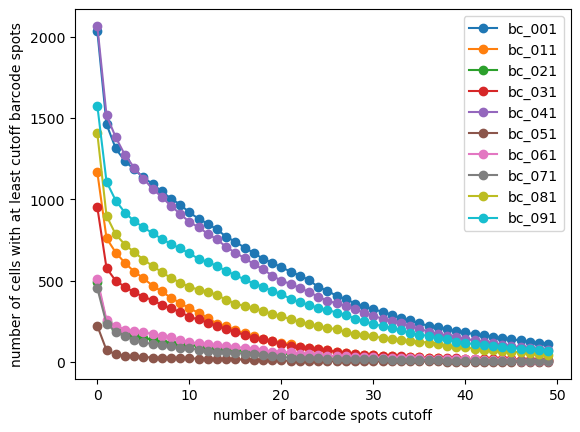

In [184]:
for bc in ['bc_{:03d}'.format(i) for i in range(1,97,10)]:

    vals = [len(matrix[matrix[bc]>c][bc].values) for c in range(50)]
    plt.plot(range(50),vals,label=bc,marker='o')
plt.legend()
plt.xlabel('number of barcode spots cutoff')
plt.ylabel('number of cells with at least cutoff barcode spots')

In [185]:
# find number of cells with at least cutoff spots per barcode

cutoff = 1
# cutoff = 3

n_cells = {}

for bc in ['bc_{:03d}'.format(i) for i in range(1,97)]:
    n_cells[bc] = len(matrix[matrix[bc]>cutoff][bc].values)




<Axes: ylabel='Count'>

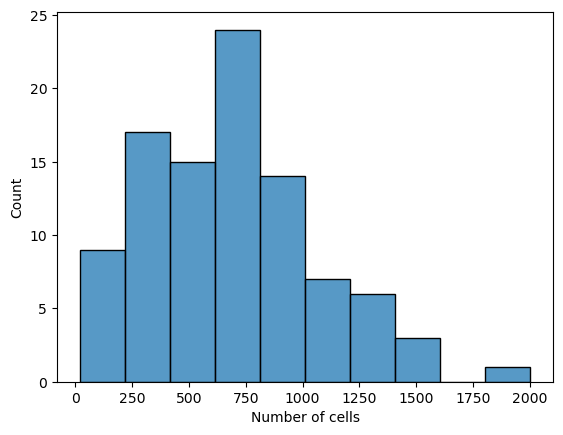

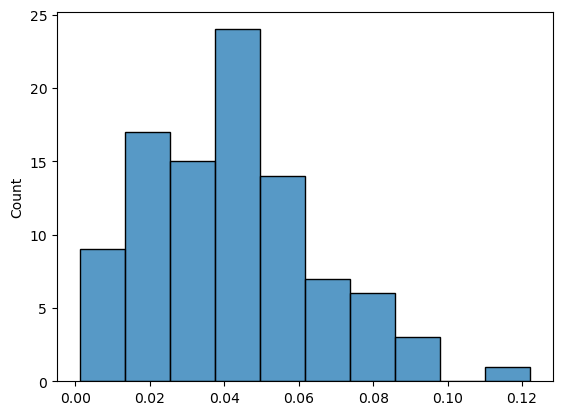

In [186]:
sns.histplot(list(n_cells.values()),kde=False)
plt.xlabel('Number of cells')
# plt.ylabel('Number of barcodes present ')
plt.figure()
sns.histplot(np.array(list(n_cells.values()))/len(matrix),kde=False)

In [187]:
cell_barcodes = {}

for cell_id in matrix['cell_id']:
    this_cell = matrix[matrix['cell_id']==cell_id]
    cell_barcodes[cell_id] = []

    for bc in barcode_cols:
        if this_cell[bc].values[0] > cutoff:
            cell_barcodes[cell_id].append(bc)

matrix['called_barcodes'] = cell_barcodes.values()
matrix['n_called_barcodes'] = [len(bc_set) for bc_set in cell_barcodes.values()]
matrix['barcode_names'] = ['-'.join(sorted(bc_set)) for bc_set in cell_barcodes.values()]

At least 1 bc 15029 16376 0.9177454811919883
At least 2 bc 12875 16376 0.7862115290669273
At least 3 bc 10333 16376 0.6309843673668784
4.012029799706888 3.1709230036007106
2.497936950930762


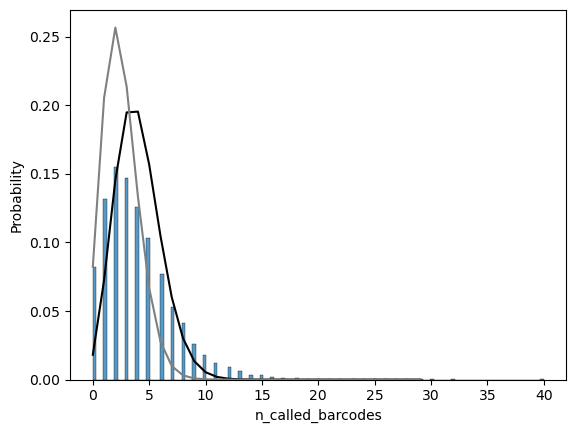

In [189]:
print('At least 1 bc',sum(matrix['n_called_barcodes']>0),len(matrix),sum(matrix['n_called_barcodes']>0)/len(matrix))
print('At least 2 bc',sum(matrix['n_called_barcodes']>1),len(matrix),sum(matrix['n_called_barcodes']>1)/len(matrix))

print('At least 3 bc',sum(matrix['n_called_barcodes']>2),len(matrix),sum(matrix['n_called_barcodes']>2)/len(matrix))

print(np.mean(matrix['n_called_barcodes']),np.std(matrix['n_called_barcodes']))

sns.histplot(matrix['n_called_barcodes'],kde=False,stat='probability')

mu_from_zeros = -np.log(1-sum(matrix['n_called_barcodes']>0)/len(matrix))
print(mu_from_zeros)
xs = range(0,30)
plt.plot(xs,scipy.stats.poisson.pmf(xs, np.mean(matrix['n_called_barcodes'])),color='k')
plt.plot(xs,scipy.stats.poisson.pmf(xs, mu_from_zeros),color='gray')

In [190]:
shared_bcs = {}

for unique_cutoff in range(1,10):

    matrix_unique = matrix[matrix['n_called_barcodes'] == unique_cutoff]

    names,counts = np.unique(matrix_unique['barcode_names'],return_counts=True)

    shared_bcs[unique_cutoff] = counts




In [191]:
matrix.to_csv(f'spatialbarcode_roi2_cell_by_gene_with_barcodes_cutoff{cutoff}.csv')


[23.67032967032967, 2.302536231884058, 1.5781865965834427, 1.4115226337448559, 1.290936785986291, 1.2196531791907514, 1.1477572559366755, 1.0748407643312101, 1.038647342995169]


Text(0, 0.5, 'Number of cells with that barcode set')

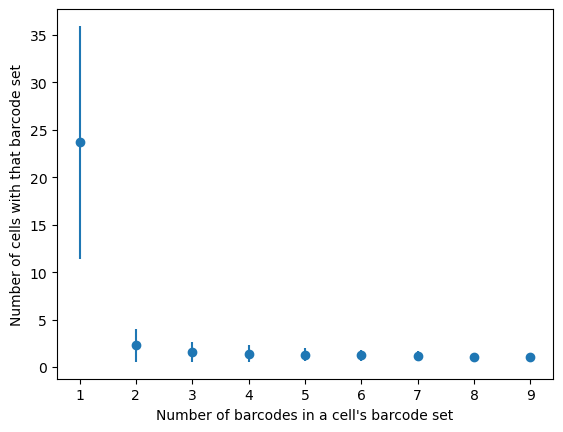

In [192]:
means = [np.mean(shared_bcs[unique_cutoff]) for unique_cutoff in range(1,10)]
stds = [np.std(shared_bcs[unique_cutoff]) for unique_cutoff in range(1,10)]

print(means)

plt.errorbar(range(1,10),means,yerr=stds,marker='o',linestyle='')
plt.xlabel("Number of barcodes in a cell's barcode set")
plt.ylabel('Number of cells with that barcode set')


In [154]:
matrix[(matrix['n_called_barcodes'].isin([3,4,5])) & (matrix['bc_001'] > 3) & (matrix['bc_009'] > 3)][['cell_id','called_barcodes','barcode_names','n_called_barcodes']+barcode_cols]

,cell_id,called_barcodes,barcode_names,n_called_barcodes,bc_001,bc_002,bc_003,bc_004,bc_005,bc_006,...,bc_087,bc_088,bc_089,bc_090,bc_091,bc_092,bc_093,bc_094,bc_095,bc_096
143,143,"[bc_001, bc_009, bc_068]",bc_001-bc_009-bc_068,3,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,188,"[bc_001, bc_009, bc_068, bc_092]",bc_001-bc_009-bc_068-bc_092,4,17,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
346,346,"[bc_001, bc_009, bc_041, bc_068]",bc_001-bc_009-bc_041-bc_068,4,7,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
390,390,"[bc_001, bc_009, bc_025, bc_074, bc_078]",bc_001-bc_009-bc_025-bc_074-bc_078,5,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1407,1407,"[bc_001, bc_009, bc_040, bc_073, bc_086]",bc_001-bc_009-bc_040-bc_073-bc_086,5,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1735,1735,"[bc_001, bc_009, bc_030, bc_091, bc_093]",bc_001-bc_009-bc_030-bc_091-bc_093,5,21,0,0,0,0,0,...,0,0,0,0,24,0,10,0,0,0
2048,2048,"[bc_001, bc_007, bc_009, bc_057, bc_073]",bc_001-bc_007-bc_009-bc_057-bc_073,5,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5462,5462,"[bc_001, bc_009, bc_033, bc_086, bc_091]",bc_001-bc_009-bc_033-bc_086-bc_091,5,12,0,0,0,0,0,...,0,0,0,0,15,0,0,0,0,0
8347,8347,"[bc_001, bc_009, bc_057, bc_070]",bc_001-bc_009-bc_057-bc_070,4,9,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8511,8511,"[bc_001, bc_009, bc_057, bc_070]",bc_001-bc_009-bc_057-bc_070,4,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
matrix[(matrix['n_called_barcodes'].isin([3,4,5,6])) & (matrix['bc_001'] > 1) & (matrix['bc_004'] > 1)][['cell_id','called_barcodes','barcode_names','n_called_barcodes']+barcode_cols]

,cell_id,called_barcodes,barcode_names,n_called_barcodes,bc_001,bc_002,bc_003,bc_004,bc_005,bc_006,...,bc_087,bc_088,bc_089,bc_090,bc_091,bc_092,bc_093,bc_094,bc_095,bc_096
131,131,"[bc_001, bc_004, bc_013, bc_031, bc_045, bc_076]",bc_001-bc_004-bc_013-bc_031-bc_045-bc_076,6,21,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
2129,2129,"[bc_001, bc_004, bc_023, bc_067, bc_071, bc_086]",bc_001-bc_004-bc_023-bc_067-bc_071-bc_086,6,48,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4437,4437,"[bc_001, bc_004, bc_043, bc_076, bc_096]",bc_001-bc_004-bc_043-bc_076-bc_096,5,9,0,0,19,0,0,...,0,0,0,0,0,0,0,0,0,4
4514,4514,"[bc_001, bc_004, bc_025, bc_060, bc_076, bc_096]",bc_001-bc_004-bc_025-bc_060-bc_076-bc_096,6,2,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,2
4579,4579,"[bc_001, bc_004, bc_025, bc_060, bc_076, bc_096]",bc_001-bc_004-bc_025-bc_060-bc_076-bc_096,6,7,1,0,27,0,0,...,1,0,0,0,0,0,0,0,0,5
5549,5549,"[bc_001, bc_004, bc_041, bc_062, bc_066]",bc_001-bc_004-bc_041-bc_062-bc_066,5,9,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
5656,5656,"[bc_001, bc_004, bc_035, bc_041, bc_062, bc_066]",bc_001-bc_004-bc_035-bc_041-bc_062-bc_066,6,28,0,0,13,0,0,...,0,0,0,0,0,0,0,0,0,0
6955,6955,"[bc_001, bc_004, bc_012, bc_041, bc_073]",bc_001-bc_004-bc_012-bc_041-bc_073,5,9,0,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0
8008,8008,"[bc_001, bc_004, bc_014]",bc_001-bc_004-bc_014,3,23,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
10179,10179,"[bc_001, bc_004, bc_005, bc_009, bc_038, bc_066]",bc_001-bc_004-bc_005-bc_009-bc_038-bc_066,6,36,0,0,28,6,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# matrix[matrix['barcode_names'] == 'bc_001-bc_005-bc_011']
# matrix[matrix['barcode_names'] == 'bc_002-bc_008-bc_040-bc_041-bc_055-bc_067-bc_087']
matrix[matrix['barcode_names'] == 'bc_014-bc_020-bc_024-bc_041-bc_047-bc_049-bc_058-bc_066-bc_067-bc_073-bc_081-bc_085']
# matrix[matrix['cell_id']==7375]['barcode_names'].values

,SOX10,MLANA,LOXL2,VCAM1,FOSL1,TYR,MYC,JUN,HIF1A,ITGAV,...,CALD1,SCG2,BGN,L1CAM,COL5A2,ENSMUSG00000071361,cell_id,called_barcodes,barcode_names,n_called_barcodes
7375,22,10,0,0,2,16,5,0,5,3,...,5,0,0,25,0,1,7375,"[bc_014, bc_020, bc_024, bc_041, bc_047, bc_04...",bc_014-bc_020-bc_024-bc_041-bc_047-bc_049-bc_0...,12


Need some way to define hamming or levenshtein distances

Text(0, 0.5, 'Sum of barcode spots')

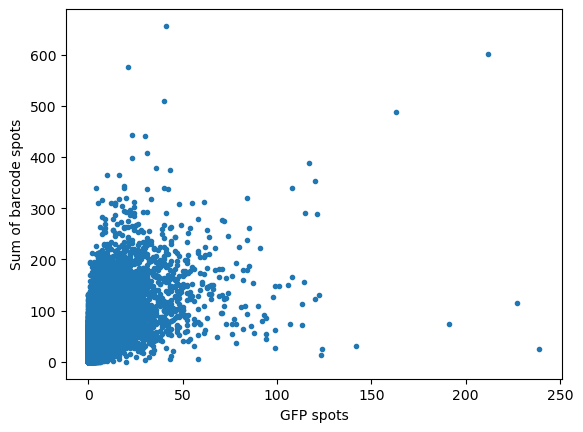

In [153]:
# plt.scatter(matrix['GFP'],np.sum(matrix[barcode_cols].values,axis=1))

# bc_matrix = matrix[barcode_cols].values
# bc_matrix_bool = (bc_matrix > 3)
# bc_matrix_filtered =  bc_matrix_bool * bc_matrix
# plt.scatter(matrix['GFP'],np.sum(bc_matrix_filtered,axis=1))
plt.scatter(matrix['GFP'],np.sum(bc_matrix,axis=1),marker='.')
plt.xlabel('GFP spots')
plt.ylabel('Sum of barcode spots')

In [158]:
matrix

,SOX10,MLANA,LOXL2,VCAM1,FOSL1,TYR,MYC,JUN,HIF1A,ITGAV,...,CALD1,SCG2,BGN,L1CAM,COL5A2,ENSMUSG00000071361,cell_id,called_barcodes,barcode_names,n_called_barcodes
1,31,0,0,0,0,7,37,0,6,2,...,6,8,0,21,0,0,1,[bc_090],bc_090,1
2,10,2,0,0,0,5,17,0,2,2,...,1,5,0,44,0,1,2,[],,0
3,11,1,0,1,0,2,7,0,2,1,...,5,1,0,8,0,0,3,"[bc_035, bc_068]",bc_035-bc_068,2
4,26,1,0,0,1,5,30,0,5,4,...,7,5,1,14,0,1,4,"[bc_035, bc_068]",bc_035-bc_068,2
5,2,0,0,0,0,1,21,1,1,0,...,4,11,1,4,0,0,5,"[bc_036, bc_044, bc_074]",bc_036-bc_044-bc_074,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16372,2,1,0,0,0,2,0,0,0,0,...,1,0,0,7,0,0,16372,[bc_035],bc_035,1
16373,3,1,0,0,1,0,1,0,0,0,...,2,0,0,2,0,0,16373,[],,0
16374,1,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,16374,[],,0
16375,4,1,0,0,0,0,5,0,0,0,...,0,0,0,3,0,0,16375,[],,0
